# <div style="text-align: center"> <h1>Project Title : E-Commerce Customer Churn Prediction</h1></div>

## OBJECTIVE:

### E-commerce customer churn prediction project aims to reduce customer loss and enhance revenue by predicting and retaining at-risk customers. Key steps include data collection, model building, intervention strategies, and continuous monitoring for business impact.

   1) Minimize Churn: Identify and reduce customer churn to maintain a stable customer base.

   2) Enhance Retention: Improve customer retention and loyalty to increase revenue.

   3) Data Analysis: Analyze customer data for insights into churn-related factors.

   4) Predictive Models: Develop machine learning models to forecast potential churn.

   5) Targeted Interventions: Implement personalized strategies to retain at-risk customers.

### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df=pd.read_csv("churn.csv")
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

#### Removing Unwanted Columns

In [4]:
df=df.drop(['user_id','joining_date','last_visit_time'],axis=1)

In [5]:
df['churn_risk_score'].value_counts()

churn_risk_score
1    20018
0    16992
Name: count, dtype: int64

#### Data Sample Balancing

In [21]:
df_passed=df[df['churn_risk_score']==1]
df_failed=df[df['churn_risk_score']==0]

df_under=df_passed.sample(18500)
df_balanced=pd.concat([df_under,df_failed],axis=0)
df=df_balanced
df['churn_risk_score'].value_counts()

churn_risk_score
1    18500
0    16992
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35492 entries, 24635 to 37008
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35492 non-null  int64  
 1   gender                        35436 non-null  object 
 2   region_category               30313 non-null  object 
 3   membership_category           35492 non-null  object 
 4   joined_through_referral       30280 non-null  object 
 5   preferred_offer_types         35214 non-null  object 
 6   medium_of_operation           30324 non-null  object 
 7   internet_option               35492 non-null  object 
 8   days_since_last_login         35492 non-null  int64  
 9   avg_time_spent                35492 non-null  float64
 10  avg_transaction_value         35492 non-null  float64
 11  avg_frequency_login_days      35492 non-null  float64
 12  points_in_wallet              35492 non-null  float64
 13  us

#### Finding Null Values

In [24]:
df.isna().sum()

age                                0
gender                            56
region_category                 5179
membership_category                0
joined_through_referral         5212
preferred_offer_types            278
medium_of_operation             5168
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [25]:
df=df.dropna()

#### Label Encoding for Categorical Values

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']]=df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']].apply(encoder.fit_transform)

/tmp/ipykernel_59136/504372442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']]=df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']].apply(encoder.fit_transform)


In [27]:
df.corr()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
age,1.000000,0.005784,0.010471,-0.001385,0.005916,-0.006436,0.003710,0.009627,-0.005213,-0.000529,-0.002063,0.001393,-0.006560,-0.000931,0.001323,-0.003663,0.005796,-0.007175,0.005175
gender,0.005784,1.000000,-0.004618,0.000671,-0.003187,0.002748,-0.005495,-0.015395,0.000910,-0.011931,0.003626,-0.006955,-0.011082,-0.014334,0.011394,-0.012120,0.000724,-0.003164,0.000073
region_category,0.010471,-0.004618,1.000000,0.012911,-0.005240,-0.016278,0.006284,-0.002725,-0.004059,0.000641,0.018670,-0.005082,0.017068,0.000680,-0.009647,0.000609,-0.003173,0.016928,-0.018972
membership_category,-0.001385,0.000671,0.012911,1.000000,-0.001514,-0.016282,-0.002061,0.005239,-0.006211,0.010710,0.095521,-0.053710,0.110576,0.004201,0.004571,-0.010966,-0.014319,0.084891,-0.458339
joined_through_referral,0.005916,-0.003187,-0.005240,-0.001514,1.000000,0.002820,-0.045749,-0.007261,-0.010018,0.165861,-0.039384,0.022173,-0.009499,0.020566,0.020880,0.001927,-0.000307,-0.035208,0.031050
preferred_offer_types,-0.006436,0.002748,-0.016278,-0.016282,0.002820,1.000000,0.010377,-0.004541,0.000945,-0.009513,-0.025329,0.005334,-0.013795,-0.001302,0.001448,-0.008877,0.001950,-0.035417,0.025528
medium_of_operation,0.003710,-0.005495,0.006284,-0.002061,-0.045749,0.010377,1.000000,-0.001355,0.010753,-0.209635,-0.015579,0.006139,-0.006550,-0.048720,-0.040167,-0.011533,-0.012801,-0.013408,0.025422
internet_option,0.009627,-0.015395,-0.002725,0.005239,-0.007261,-0.004541,-0.001355,1.000000,0.001873,0.004371,-0.007059,0.008110,0.002445,-0.000029,0.002339,0.004915,-0.007136,0.009298,-0.006743
days_since_last_login,-0.005213,0.000910,-0.004059,-0.006211,-0.010018,0.000945,0.010753,0.001873,1.000000,0.002507,0.003384,-0.007185,-0.002186,0.005280,-0.011769,-0.008239,0.001836,0.011494,0.001567
avg_time_spent,-0.000529,-0.011931,0.000641,0.010710,0.165861,-0.009513,-0.209635,0.004371,0.002507,1.000000,0.026884,-0.003779,-0.010650,0.079891,0.079749,0.011288,0.008877,0.012693,-0.009099


In [28]:
corr = df.corr()
corr['churn_risk_score']

age                             0.005175
gender                          0.000073
region_category                -0.018972
membership_category            -0.458339
joined_through_referral         0.031050
preferred_offer_types           0.025528
medium_of_operation             0.025422
internet_option                -0.006743
days_since_last_login           0.001567
avg_time_spent                 -0.009099
avg_transaction_value          -0.216551
avg_frequency_login_days        0.118969
points_in_wallet               -0.194936
used_special_discount          -0.009257
offer_application_preference   -0.020189
past_complaint                  0.007100
complaint_status               -0.000873
feedback                       -0.207286
churn_risk_score                1.000000
Name: churn_risk_score, dtype: float64

In [29]:
X=df.drop(["churn_risk_score",'days_since_last_login','membership_category','medium_of_operation'],axis=1)
Y=df['churn_risk_score']
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21950 entries, 24635 to 37008
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           21950 non-null  int64  
 1   gender                        21950 non-null  int64  
 2   region_category               21950 non-null  int64  
 3   joined_through_referral       21950 non-null  int64  
 4   preferred_offer_types         21950 non-null  int64  
 5   internet_option               21950 non-null  int64  
 6   avg_time_spent                21950 non-null  float64
 7   avg_transaction_value         21950 non-null  float64
 8   avg_frequency_login_days      21950 non-null  float64
 9   points_in_wallet              21950 non-null  float64
 10  used_special_discount         21950 non-null  int64  
 11  offer_application_preference  21950 non-null  int64  
 12  past_complaint                21950 non-null  int64  
 13  co

,age,gender,region_category,joined_through_referral,preferred_offer_types,internet_option,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
24635,52,1,0,1,2,0,511.92,41398.14,5.0,299.791955,1,0,1,2,2
10982,60,0,0,1,2,2,42.02,14534.84,20.0,0.000000,1,0,0,1,7
8906,32,1,0,1,0,1,1056.75,11805.47,0.0,0.000000,1,0,0,1,7
14295,39,0,0,0,1,1,407.15,24001.29,29.0,711.340000,1,1,0,1,1
6275,55,1,2,0,1,1,32.97,29602.65,13.0,560.120000,0,1,1,3,3


In [12]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=1)
# pca.fit_transform(X)

#### Splitting Dataset Into Traning & Testing 

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=12345,test_size=0.3)

### Building Model 

In [31]:
import pickle

def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [32]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model

In [33]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

In [34]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

In [35]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model

In [36]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'dt.pkl')
    return model

In [37]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'rf.pkl')
    return model

In [38]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

In [39]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

#### Evaluation Matrics 

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = f"{accuracy_score(y_true, y_pred)*100:.2f}%"
    precision = f"{precision_score(y_true, y_pred,average='macro')*100:.2f}%"
    recall = f"{recall_score(y_true, y_pred,average='macro')*100:.2f}%"
    f1 = f"{f1_score(y_true, y_pred,average='macro')*100:.2f}%"
    return accuracy, precision, recall, f1

In [41]:
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "DT", "function": build_dt_model},
    {"name": "RF", "function": build_rf_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]
model_evaluation_report = []

# iterate over the list, create model and evaluate the model
for model_info in model_functions:
    model = model_info["function"]()
    metrics_train = evaluate_model(model)
    metrics_test = evaluate_model(model)
    model_evaluation_report.append({
        "name": model_info["name"],
        "train_accuracy": metrics_train[0],
        "train_precision": metrics_train[1], 
        "train_recall": metrics_train[2],
        "train_f1": metrics_train[3],
        "accuracy": metrics_test[0],
        "precision": metrics_test[1], 
        "recall": metrics_test[2],
        "f1": metrics_test[3]
            
    })

# create a data frame of the result
df_result = pd.DataFrame(model_evaluation_report)
df_result

/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

,name,train_accuracy,train_precision,train_recall,train_f1,accuracy,precision,recall,f1
0,SVM,59.82%,78.17%,58.28%,50.24%,59.82%,78.17%,58.28%,50.24%
1,LG,61.41%,61.36%,61.36%,61.36%,61.41%,61.36%,61.36%,61.36%
2,KNN,74.70%,74.72%,74.58%,74.61%,74.70%,74.72%,74.58%,74.61%
3,NB,63.05%,63.67%,62.53%,62.03%,63.05%,63.67%,62.53%,62.03%
4,DT,83.13%,83.10%,83.12%,83.11%,83.13%,83.10%,83.12%,83.11%
5,RF,86.42%,86.56%,86.31%,86.37%,86.42%,86.56%,86.31%,86.37%
6,CatBoost,86.77%,87.01%,86.62%,86.70%,86.77%,87.01%,86.62%,86.70%
7,XGBoost,86.64%,86.82%,86.50%,86.57%,86.64%,86.82%,86.50%,86.57%


## DATA VISUALIZATION USING TABLEAU

### [Tableau Dashboard](https://public.tableau.com/app/profile/gulshan.gedam/viz/ProjectWorkinProgess/Dashboard3?publish=yes)

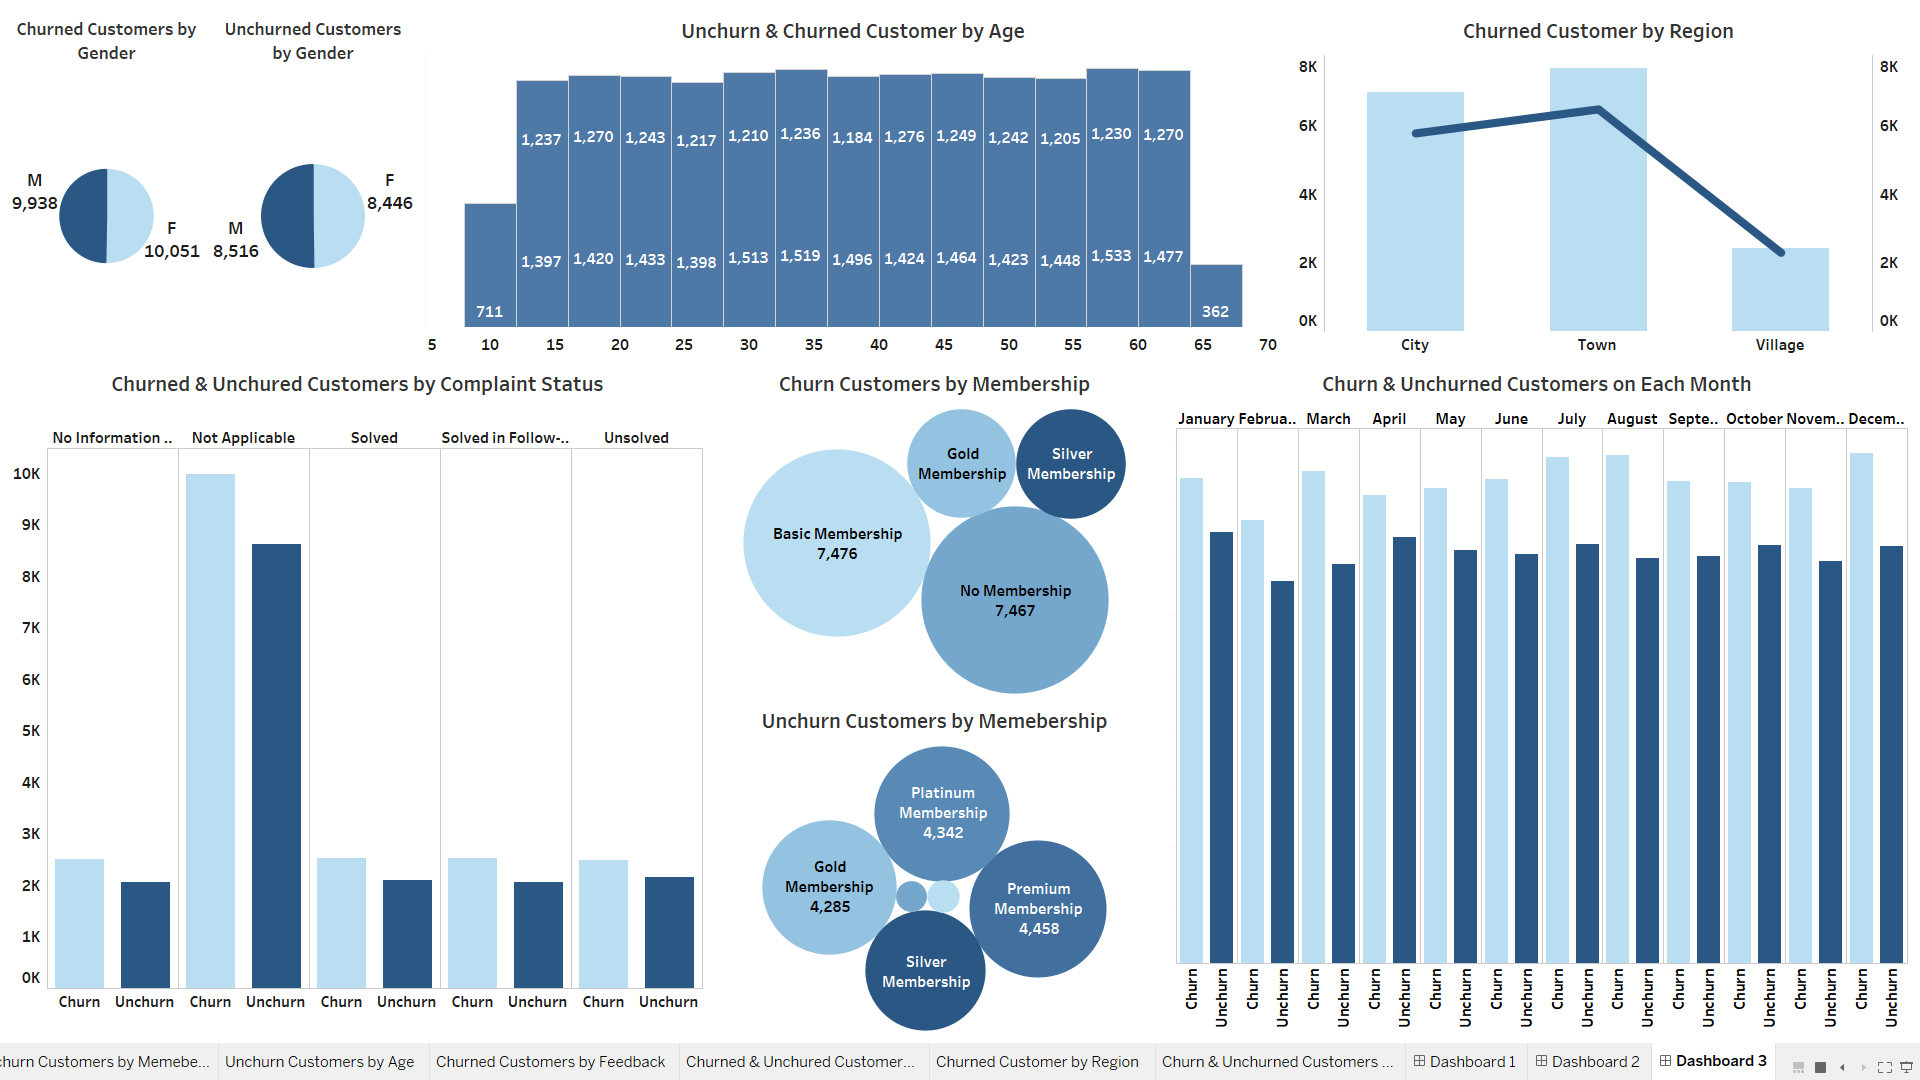